## ML 6- Regularized Linear Regression - Bias-Variance tradeoff

**Objectives**: Implement Regularized Linear Regression algorithm and use it to study the bias-variance tradeoff.

The task is to implement regularized linear regression to predict the amount of water owing out of a dam using the change of water level in a reservoir. You will examine the effects of bias versus variance. 

In [3]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


### Loading the data

The task is to implement regularized linear regression to predict the amount of water owing out of a dam using the change of water level in a reservoir. You will examine the effects of bias versus variance.

File *ex5data1.mat* contains historical records on the change in the water level, x, and the amount of water owing out of the dam, y. The dataset is divided into the following parts:

• Training set ( X, y) used to fit the model.

• Cross validation set (Xval, yval) for determining the regularization parameter.

• Test set (Xtest, ytest) for evaluating performance. These are examples which the model did not see during training. 


In [27]:
# Use loadmat to load the matlab file and extraact train, CV and test subsets. 
data = loadmat("ex5data1.mat")

X = data["X"]
y = data["y"]

Xval = data["Xval"]
yval = data["yval"]

Xtest = data["Xtest"]
ytest = data["ytest"]

m = X.shape[0]  # Number of training examples - 12
mtest = Xval.shape[0] # Number of validation examples - 21 
mval = Xtest.shape[0]  # Number of testing examples - 21


12


### Plot the data

Plot the training data and get a figure similar to Fig.1. 

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1** : **Training data** </center></caption>

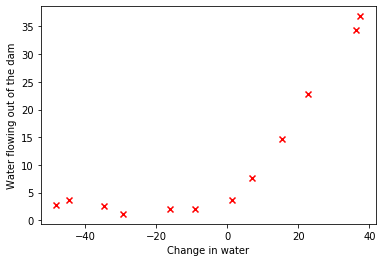

In [30]:
# Create Fig.1. Use similar code from previous labs 
plt.scatter(X, y, marker="x", color="r")
plt.xlabel("Change in water")
plt.ylabel("Water flowing out of the dam")
plt.show()

### Regularized Linear Regression Cost (Loss) Function

Now, you will implement Linear Regression to fit a straight line to the data and plot the learning curves. 

The regularized Linear Regression Cost (Loss) Function is:

$J(\theta) = \frac{1}{2m} (\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m}(\sum_{j=1}^n \theta_j^2)$

Recall that $\lambda$ is the regularization parameter which helps preventing overfitting. The regularization term puts a penalty on the overall cost $J(\theta)$. Note that you should not regularize $\theta_0$  term. 

Complete the code in function *linearRegCostFunction* to calculate the Regularized Linear Regression Cost (Loss) function and its gradients with respect to thetas. 

In [31]:
def linearRegCostFunction(X, y, theta, Lambda):
    
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the linear regression model.
    
    """
    
    # Number of training examples 
    m = X.shape[0]
    
    # linear regression model
    h = np.dot(X, theta)
    
    cost = 1/(2*m) * np.sum((h - y)**2)
    reg_cost = cost + Lambda/(2*m) * (np.sum(theta[1:]**2))
    
    # compute the gradient
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    #  make the complete gradient a column vector
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return reg_cost, grad_all
    

### Fitting Linear Regression

Once the cost function and the gradients are computed correctly, run *gradientDescent* to compute the optimal values of $\theta$. 

Here, we set the regularization parameter $\lambda$ = 0. Because the linear regression is trying to fit a 2D $\theta$, regularization will not be much helpful for $\theta$ of such low dimension. 

In [32]:
def gradientDescent(X,y,theta,learn_rate,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = linearRegCostFunction(X,y,theta,Lambda)
        theta = theta - (learn_rate * grad)
        J_history.append(cost)
    
    return theta, J_history

In [35]:
# add an extra columns of 1 to X (recall axis=0 are the rows, axis=1 are the columns)
X_1 = np.append(np.ones((m,1)), X, axis=1)

Lambda = 0
learn_rate = 0.001
# choose different number of iterations 
num_iter = 3000

# inicialize all theta at 0.
n = X_1.shape[1] # number of features
initial_theta = np.zeros((n,1))

# compute the optimal theta
theta, J_history = gradientDescent(X_1, y, initial_theta, learn_rate, num_iter, Lambda)

### Plot the Cost Function history

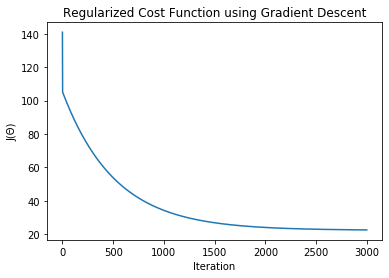

In [37]:
plt.plot(J_history)
#add labels
plt.xlabel("Iteration")
plt.ylabel("J(Θ)")
plt.title("Regularized Cost Function using Gradient Descent")
plt.show()

### Plot the data and its linear model
You should get a figure similar to Fig.2. This best fit line tells that the model is not a good fit to the data. 

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig.2** : **Linear fit** </center></caption>

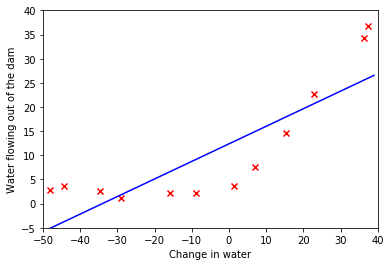

In [41]:
#add the scatter plot of data (as above) 
plt.scatter(X, y, marker="x", color="r")
plt.xlabel("Change in water")
plt.ylabel("Water flowing out of the dam")
#Plot the best linear model
x_fit=range(-50,40)
y_fit=theta[0]+theta[1]*x_fit
plt.plot(x_fit,y_fit,color="b")

plt.ylim(-5,40)
plt.xlim(-50,40)
plt.show()

### Bias-variance and learning curves 

An important concept in Machine Learning is the **bias-variance** tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. 

Now, you will plot training and cross validation learning curves to diagnose bias-variance problems. 
To plot the learning curve, we need training and cross validation errors for different training set sizes. To obtain different training set sizes, *learningCurve* use different subsets of the original training set X. Specifically, for a training set size of i, the first i examples (i.e., X(0:i,:) and y(0:i)) are used.


In [45]:
def learningCurve(X, y, Xval, yval, learn_rate, num_iter, Lambda):
    
    """
    Returns the train and cross validation set errors for a learning curve
    """
   
    m = X.shape[0]  # Number of training examples 
    n = X.shape[1]  # number of features 
    mval = Xval.shape[0]  # Number of validation examples 

    error_train, error_val = [],[]
    
    for i in range(1,m+1):
        
        # inicialize all theta at 0. 
        initial_theta = np.zeros((n,1))
        Xtrain=X[0:i,:]
        ytrain=y[0:i,:]
        theta = gradientDescent( Xtrain, ytrain,initial_theta,learn_rate,num_iter,Lambda)[0]
        
        h_train = np.dot(Xtrain, theta)
        h_val = np.dot(Xval, theta)
        
        error_train_i = 1/(2*m) * np.sum((h_train - ytrain)**2)
        error_val_i = 1/(2*mval) * np.sum((h_val - yval)**2)
        
        error_train.append(error_train_i)
        error_val.append(error_val_i)

    return error_train, error_val

In [48]:
# add an extra columns of 1 to Xval
Xval_1 = np.append(np.ones((mval,1)), Xval, axis=1)

# Call learningCurve to compute E_train and E_validation
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, learn_rate, num_iter, Lambda)

### Plot the learning curves

Plot the learning curves as shown in Fig. 3. You can observe that both the training and the cross validation errors are high even when the number of training examples increases. This reflects a high bias problem of the model. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> **Fig.3** : **Linear Regression learning curves** </center></caption>

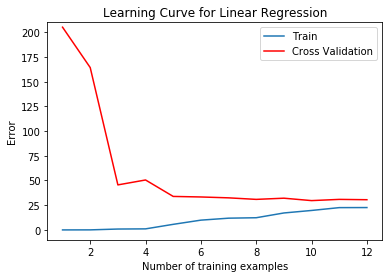

In [50]:
plt.plot(range(1,m+1),error_train)
plt.plot(range(1,m+1), error_val,color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend(["Train", "Cross Validation"])
plt.ylim(-10,210)
plt.show()


### Polynomial Regression

The linear model is too simple for this data and resulted in underfitting (high bias). Now, you will address this problem by adding more features using higher powers of the original feature (waterLevel), such as:

<img src="images/f4.png" style="width:450px;height:50px;">
<caption><center> **Fig.4**: **Polynomial Regression model** </center></caption>

Keep in mind that even though we have polynomial terms in the model above, we are still solving a linear regression optimization problem. The polynomial terms are simply new features that we can use for linear regression. The function *polyFeatures* maps the original training set X of size mx1 into its higher powers. Specifically, when a training set X of size mx1 is passed into the function, the function should return a mxp matrix X_poly, where 1st column holds the original values of X, 2nd column holds the values of $X^2$,  3rd column holds the values of $X.^3$, and so on. 

Function *polyFeatures* is applied to the training, cross validation and test sets. 



In [51]:
def polyFeatures(X, degree):
    """
    Takes a data matrix X (size m x 1) and maps each example into its polynomial features where 
    X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^degree];
    """
    m = X.shape[0]  # Number of training examples 
    
    for i in range(2,degree+1):
        var=X[:,0]**i
        X = np.append(X, var.reshape(m,1), axis=1)
        
    return X

In [82]:
from sklearn.preprocessing import StandardScaler

# Map X onto Polynomial features (call polyFeatures)
degree = 8
X_poly = polyFeatures(X, 8)

# Check the range of values for the polynomial features
print(np.min(X_poly))
print(np.max(X_poly))

# Normalize features with StandardScaler function of sklearn library
sc_X=StandardScaler()
X_poly_normalized=sc_X.fit_transform(X_poly)

# Check the range of values for the normalized features 
print(np.min(X_poly_normalized))
print(np.max(X_poly_normalized))

# Add an extra column of 1' to X_poly
X_poly_normalized = np.append(np.ones((m,1)), X_poly_normalized, axis=1)


-592123531634.1227
28456763821657.78
-2.76331690131688
2.8890818199263832


In [83]:
# Map Xtest onto polynomial features and normalize (the same way as X)
X_poly_test = polyFeatures(Xtest, degree)
X_poly_test_normalized = sc_X.transform(X_poly_test)

# Add an extra column of 1' to X_poly_test
X_poly_test_normalized = np.append(np.ones((mtest, 1)), X_poly_test_normalized, axis=1)

print(np.max(X_poly_test_normalized))
print(np.min(X_poly_test_normalized))


10.996070640561772
-8.684870735892668


In [84]:
# Map Xval onto polynomial features and normalize, add column of 1
X_poly_val = polyFeatures(Xval, degree)
X_poly_val_normalized = sc_X.transform(X_poly_val)

# Add an extra column of 1' to X_poly_test
X_poly_val_normalized = np.append(np.ones((mval, 1)), X_poly_val_normalized, axis=1)

print(np.max(X_poly_val_normalized))
print(np.min(X_poly_val_normalized))

4.173913770667505
-3.768953028896382


### Learning Polynomial Regression

The training of the polynomial model uses the same linear regression cost function and gradient that you wrote for the earlier part of the assignment.

Let assume a polynomial of degree 8. If we run the training directly on the data, it will not work well as the features would be badly scaled (e.g., an example with x = 40 will now have a feature x8 = 40^8 = 6.5x10^12). Therefore, before learning the parameters, the features of the training set are first normalized (function *featureNormalize*), storing the mean (mu) and the standard deviation (sigma) parameters. After training is over, you should see two plots (Figs. 5 and 6) generated for  = $\lambda$=0.
See that the polynomial fit is able to follow the data points very well (Fig.5) and therefore the training error is low (almost equal to zero in Fig.6). However, there is a gap between the training and cross validation errors (Fig.6), indicating a high variance problem due to the lack of regularization ( $\lambda$=0). 

<img src="images/f5.png" style="width:350px;height:250px;">
<caption><center> **Fig.5**: **Polynomial Fit** </center></caption>


<img src="images/f6.png" style="width:350px;height:250px;">
<caption><center> **Fig.6**: **Linear Regression learning curves** </center></caption>

<img src="images/f7.png" style="width:350px;height:250px;">
<caption><center> **Fig.7**: **Cost function trajectory** </center></caption>

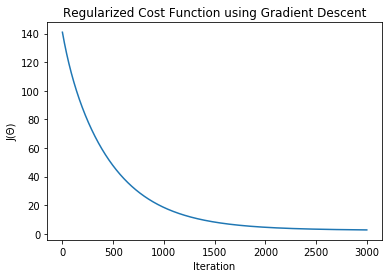

In [79]:
# n is now the new number of features after adding polynomial terms
n = X_poly_normalized.shape[1]

Lambda=0
num_iter=3000
learn_rate=0.001

# inicialize all theta at 0. 
init_theta = np.zeros((n,1))


#call gradientDescent(X,y,theta,learn_rate,num_iters,Lambda)
theta_poly, J_history_poly = gradientDescent(X_poly_normalized,y,init_theta,learn_rate,num_iter,Lambda) 

#Create Fig.7
plt.plot(J_history_poly)
#add labels
plt.xlabel("Iteration")
plt.ylabel("J(Θ)")
plt.title("Regularized Cost Function using Gradient Descent")
plt.show()


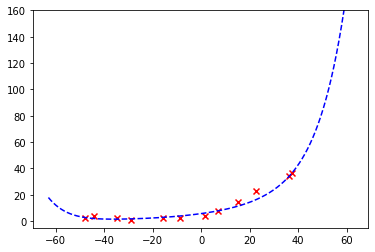

In [77]:
#Code to get Fig.5
#add the scatter plot of data (as above) 
plt.scatter(X, y, marker="x", color="r")

xmin = np.min(X) - 15
xmax=np.max(X) + 25

x_value=np.linspace(xmin,xmax,2400)
x_value=x_value.reshape(x_value.shape[0],1)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value, degree)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.append(np.ones((x_value_poly.shape[0],1)),x_value_poly, axis=1)
y_value= np.dot(x_value_poly, theta_poly)
plt.plot(x_value,y_value,"--",color="b")
plt.ylim(-5,160)
plt.show()

In [85]:
# Call learningCurve to compute E_train and E_validation

error_train, error_val = learningCurve(X_poly_normalized, y, X_poly_val_normalized, yval, learn_rate, num_iter, Lambda)


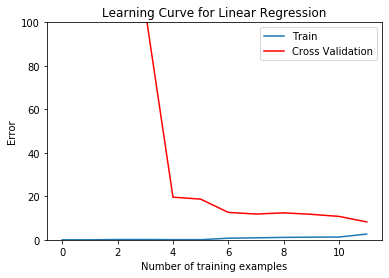

In [87]:
#Code to get Fig.6

plt.plot(range(m),error_train,label="Train")
plt.plot(range(m),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.ylim(0,100)
plt.show()

### Polynomial regression with $\lambda$ =  [0.001; 0.003; 0.01; 0.03; 0.1; 0.3; 1; 3; 10] ) 

Find the best $\lambda$ from a grid search and compute the training, validation and test errors. 

In [88]:
def validationCurve (X, y, Xval, yval, learn_rate, num_iter, Lambda_array):

    """
    Returns the best lambda and the respective train and cross validation set errors
    """
    m = X.shape[0]  # Number of training examples 
    n = X.shape[1] # number of features 
    mval = Xval.shape[0]  # Number of validation examples 
    
    error_train, error_val = [],[]
    
    for lam in Lambda_array:
        theta_ini=np.zeros((n,1))
        theta = gradientDescent( X, y,theta_ini,learn_rate,num_iter,lam)[0]
        pred_train = np.dot(X,theta)
        pred_val = np.dot(Xval,theta)
        error_train_i = 1/(2*m) * np.sum((pred_train - y)**2)
        error_val_i = 1/(2*mval) * np.sum((pred_val - yval)**2)
        error_train.append(error_train_i)
        error_val.append(error_val_i)
    
    ind = np.argmin(error_val)
    best_lambda=Lambda_array[ind]
        
    return best_lambda, error_train, error_val

3
5.259400093434629
4.596700974121367
4.332700227851716


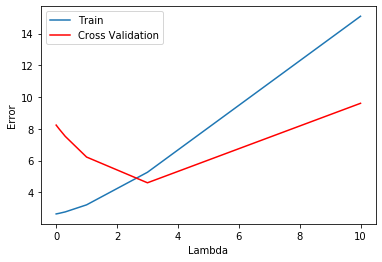

In [95]:
Lambda_array = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

best_lambda, error_train, error_val = validationCurve(X_poly_normalized, y, X_poly_val_normalized, yval, learn_rate, num_iter, Lambda_array)

print(best_lambda)

plt.plot(Lambda_array,error_train,label="Train")
plt.plot(Lambda_array,error_val,label="Cross Validation",color="r")
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend()

#for the best_lambda computed above, print the training (Etrain), validation (Eval) and test (Etest) errors

# inicialize all theta at 0. 
theta_ini = np.zeros((n,1))
theta_poly = gradientDescent(X_poly_normalized, y,theta_ini,learn_rate,num_iter,best_lambda)[0]

pred = np.dot(X_poly_normalized,theta_poly)
Etrain = 1/(2*m) * np.sum((pred - y)**2)

pred_val = np.dot(X_poly_val_normalized,theta_poly)
Eval = 1/(2*mval) * np.sum((pred_val - yval)**2)

pred_test = np.dot(X_poly_test_normalized, theta_poly)
Etest = 1/(2*mtest) * np.sum((pred_test - ytest)**2)

print(Etrain)
print(Eval)
print(Etest)
